<a href="https://colab.research.google.com/github/CristianoDataScience/suavizacao-exponencial/blob/main/suavizacao_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Suavização Exponencial Simples***

##### Cientista de Dados: Cristiano Santana

## Importando Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
rcParams['figure.figsize'] = 15, 6
%matplotlib inline

In [3]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/Serie Temporal/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

<ipython-input-3-64b6faeceae8>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/drive/MyDrive/Serie Temporal/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)


In [5]:
data.index.freq = "MS"
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12)

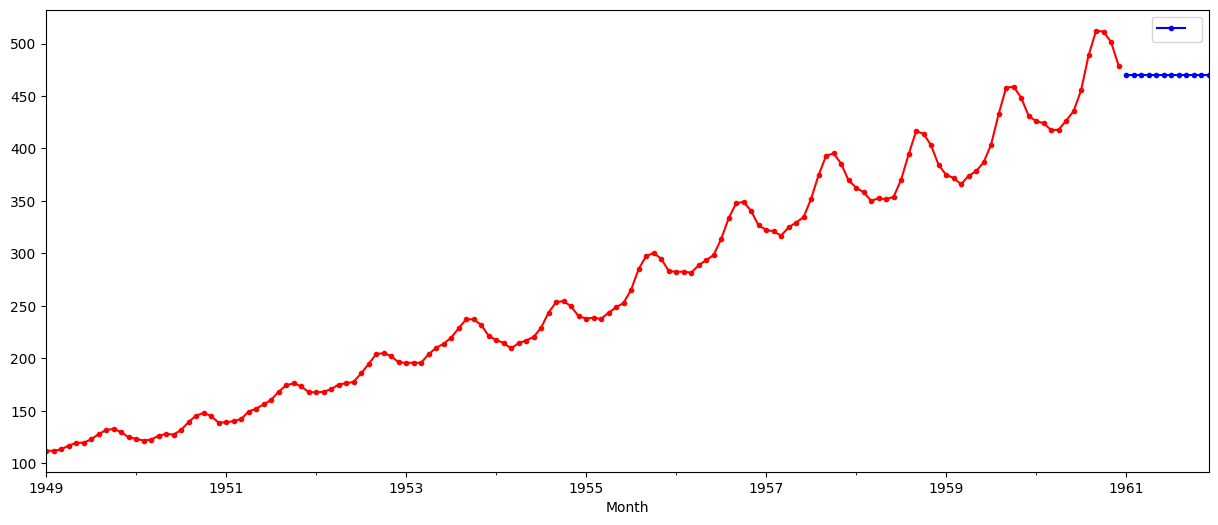

In [13]:
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='red')
plt.show()

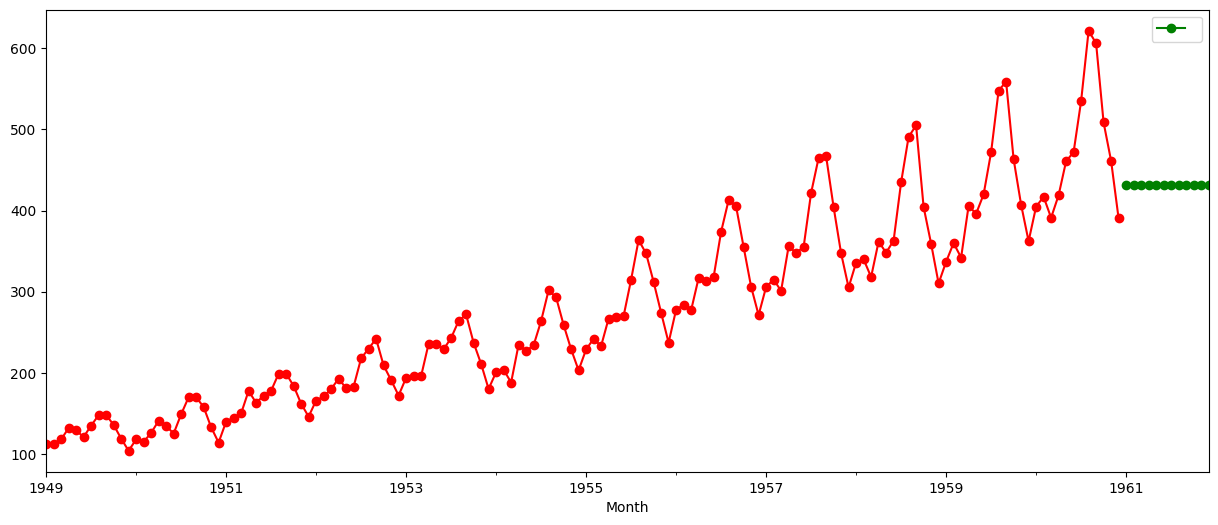

In [12]:
data.index.freq = "MS"
fit3 = SimpleExpSmoothing(data).fit(optimized=True)
fcast3 = fit3.forecast(12)
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red')
plt.show()

## Suavização Exponencial Simples e Amortecida

In [23]:
data.index.freq = "MS"
# smoothing_trend (beta) 80% de influência na tendência mais atual
fit2 = Holt(data).fit(smoothing_level=0.2, smoothing_trend=0.8, optimized=False)
fcast2 = fit2.forecast(12)

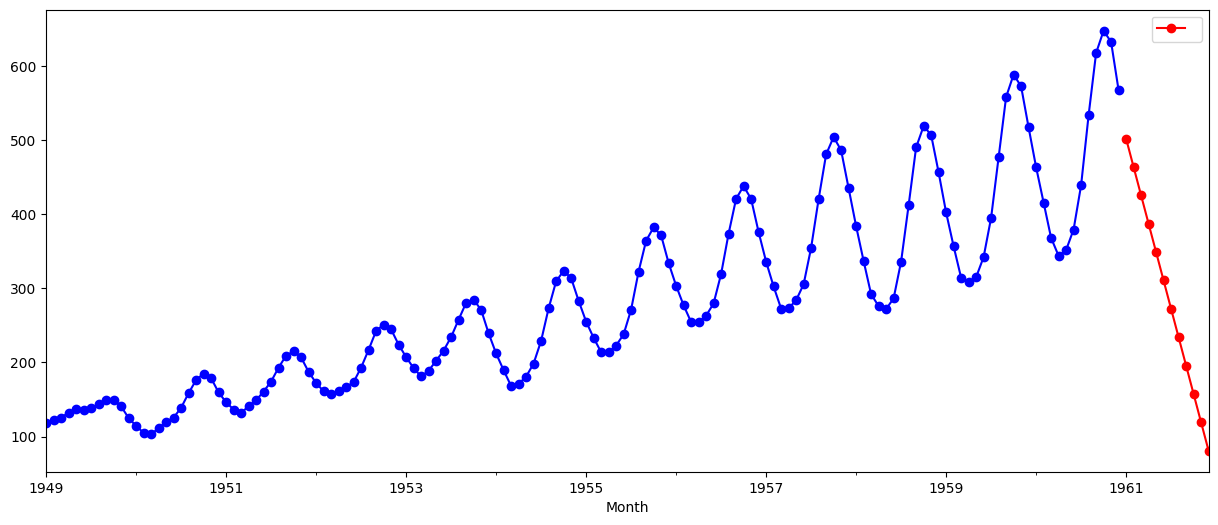

In [24]:
fit2.fittedvalues.plot(marker='o', color='blue')
fcast2.plot(marker='o', color='red', legend=True)
plt.show()

In [17]:
data.index.freq = "MS"
# suavização da tendência phi
fit4 = Holt(data, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast4 = fit4.forecast(12)

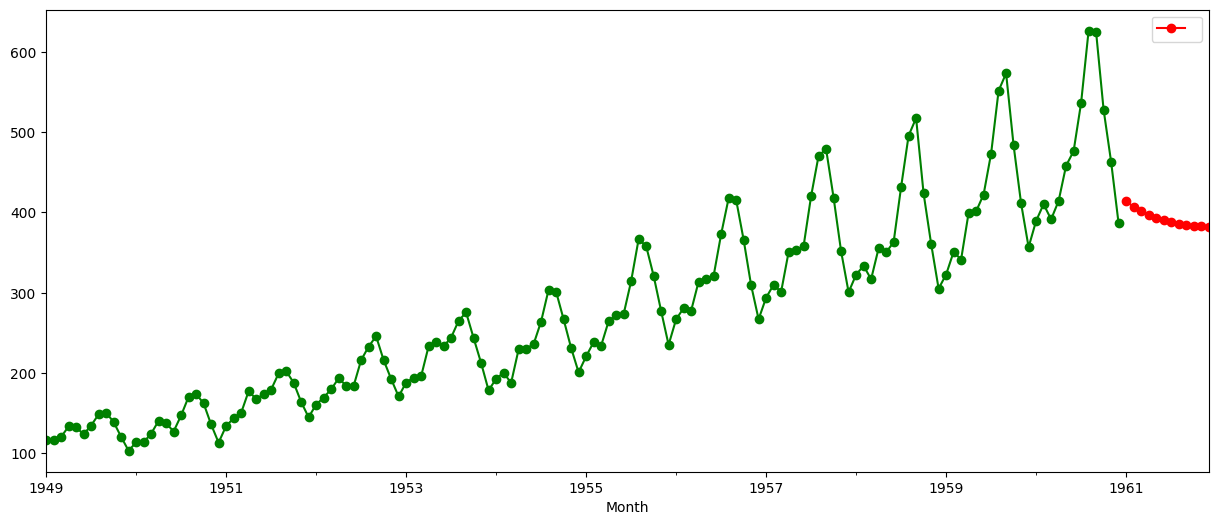

In [18]:
fit4.fittedvalues.plot(marker='o', color='green')
fcast4.plot(marker='o', color='red', legend=True)
plt.show()